# Inhibition characterisation
Here I will characterise how the total inhibition of the system depends on K_r and the sparness of the parameters, and the Gain.

In [12]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(font_scale=3.0)

from network import MinaNetwork

## How many iterations do we need for the parameters to converge

In [16]:
N_input = 200  # Inputs size
N_recurrent = 200  # C3 size
v = 25.0   # Input - C3 connection
b = 25.0   # Input - C1 connection
Kr = 5.8   # Recurrent self-inhibition gain
Ki = 1.0  # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 1.0  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Patterns
number_of_patterns = 10
sparsity = 5.0

nn = MinaNetwork(n_input=N_input, n_recurrent=N_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)


sequence1 = [0, 1, 2, 3, 4]
epsilon = 0.1
training_time = 50

quantities = nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1, save_quantities=True)

In [17]:
m = quantities['m']
w = [x[11, 0] for x in quantities['w']]
inhibition = quantities['inhibition_r']


m_average = np.zeros(len(m))
w_average = np.zeros(len(m))
inhibition_average = np.zeros(len(m))

for i in range(2, len(m)):
    m_average[i] = np.mean(m[:i])
    w_average[i] = np.mean(w[:i])
    inhibition_average[i] = np.mean(inhibition[:i])

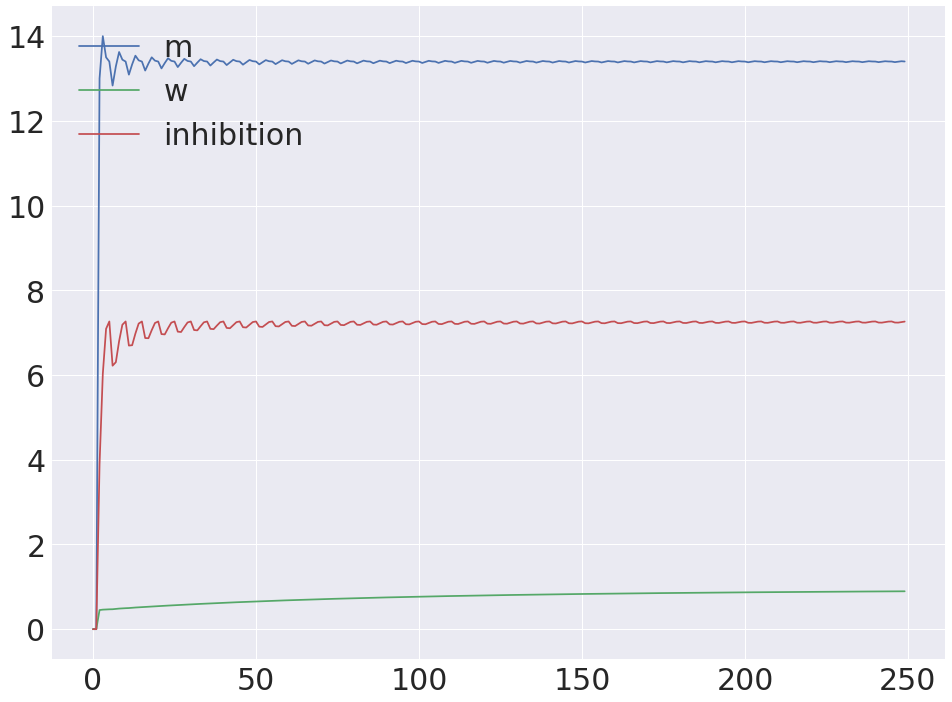

In [18]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(m_average, label='m');
ax.plot(w_average, label='w')
ax.plot(inhibition_average, label='inhibition')

ax.legend();

We can see that around 50 iterations (50 x 5 = 250) gets the job done

## Test for Kr
What we are dealing with?
The thing is that if Kr is too small then there is not enough inhibition and everything becomes connected to everything. But if Kr is too big then there is not structure in the *hidden layer*. Previous experimentation dictactes that a reasonable number to expect is between 4 and 7

In [47]:
N_input = 200  # Inputs size
N_recurrent = 200  # C3 size
v = 25.0   # Input - C3 connection
b = 25.0   # Input - C1 connection
Kr = 5.8   # Recurrent self-inhibition gain
Ki = 1.0  # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 1.0  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Patterns
number_of_patterns = 10
sparsity = 5.0

# Training 
sequence1 = [0, 1, 2, 3, 4]
epsilon = 0.1
training_time = 50

Kr_vector = np.linspace(start=5, stop=6, num=30)
m_means = np.zeros(Kr_vector.size)
m_std = np.zeros(Kr_vector.size)
inhibition_means = np.zeros(Kr_vector.size)
inhibition_std = np.zeros(Kr_vector.size)

In [48]:
for index, Kr in enumerate(Kr_vector):
    nn = MinaNetwork(n_input=N_input, n_recurrent=N_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, 
                     Ci=Ci, Cr=Cr, theta=theta, phi=phi, uniform_w=False)

    nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)
    quantities = nn.train_network(epsilon=epsilon, training_time=training_time, 
                                  sequence=sequence1, save_quantities=True)
    # Extract the quantities
    m = quantities['m']
    inhibition = quantities['inhibition_r']
    
    m_means[index] = np.mean(m)
    m_std[index] = np.std(m)
    inhibition_means[index] = np.mean(inhibition)
    inhibition_std[index] = np.std(inhibition)

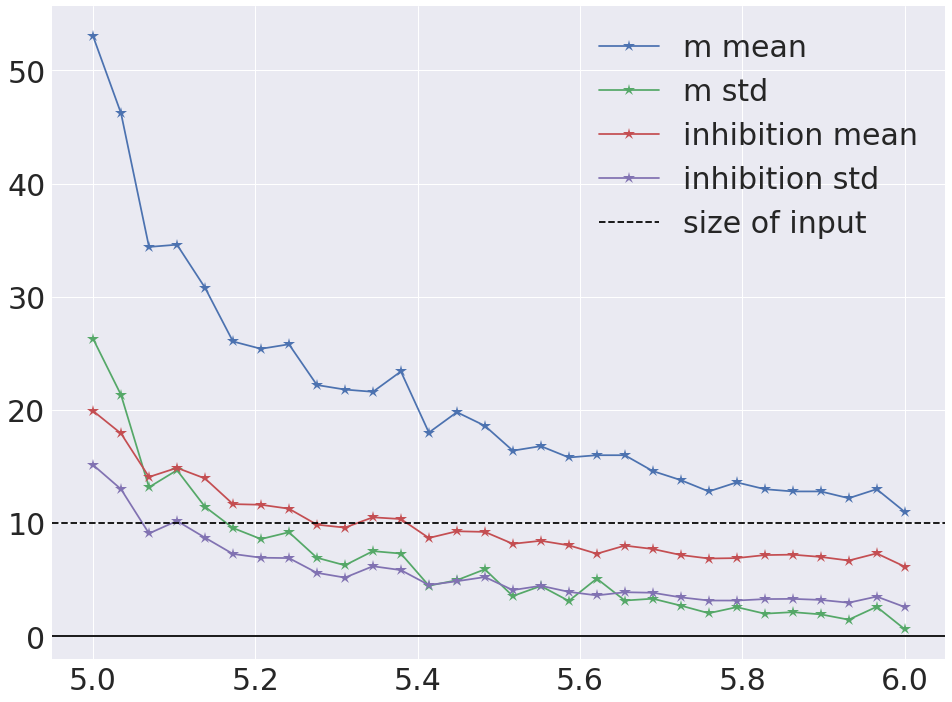

In [49]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(Kr_vector, m_means, '*-', markersize=13, label='m mean')
ax.plot(Kr_vector, m_std, '*-', markersize=13, label='m std')

ax.plot(Kr_vector, inhibition_means, '*-', markersize=13, label='inhibition mean')
ax.plot(Kr_vector, inhibition_std, '*-', markersize=13, label='inhibition std')

ax.axhline(nn.number_of_patterns, ls='--', color='black', label='size of input')

ax.axhline(0, ls='-', color='black')

ax.legend();

### 